In [1]:
from gidnet.qubitreuse import GidNET

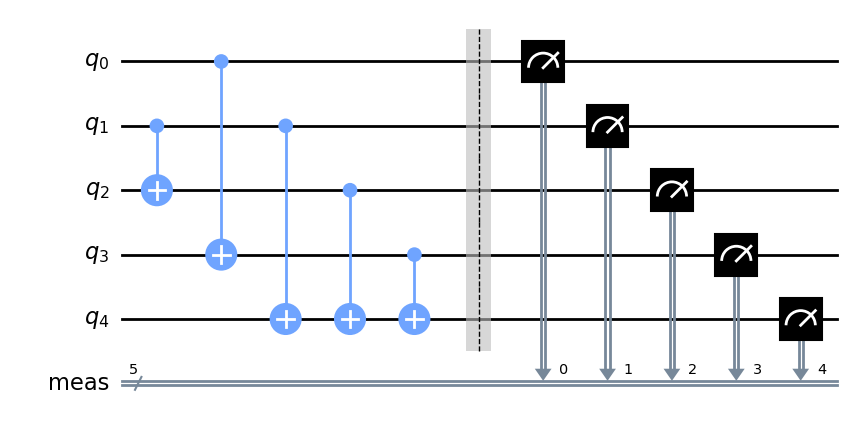

In [2]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(5)

circ.cx(1,2)
circ.cx(0,3)

circ.cx(1,4)
circ.cx(2,4)
circ.cx(3,4)


circ.measure_all()

circ.draw('mpl')

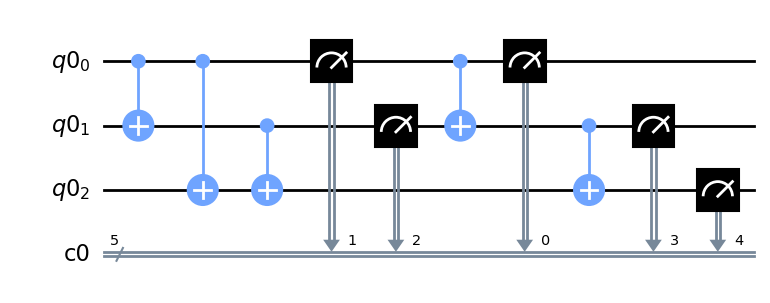

In [3]:
gidnet = GidNET(circ)
gidnet.compile_to_dynamic_circuit(draw=True)

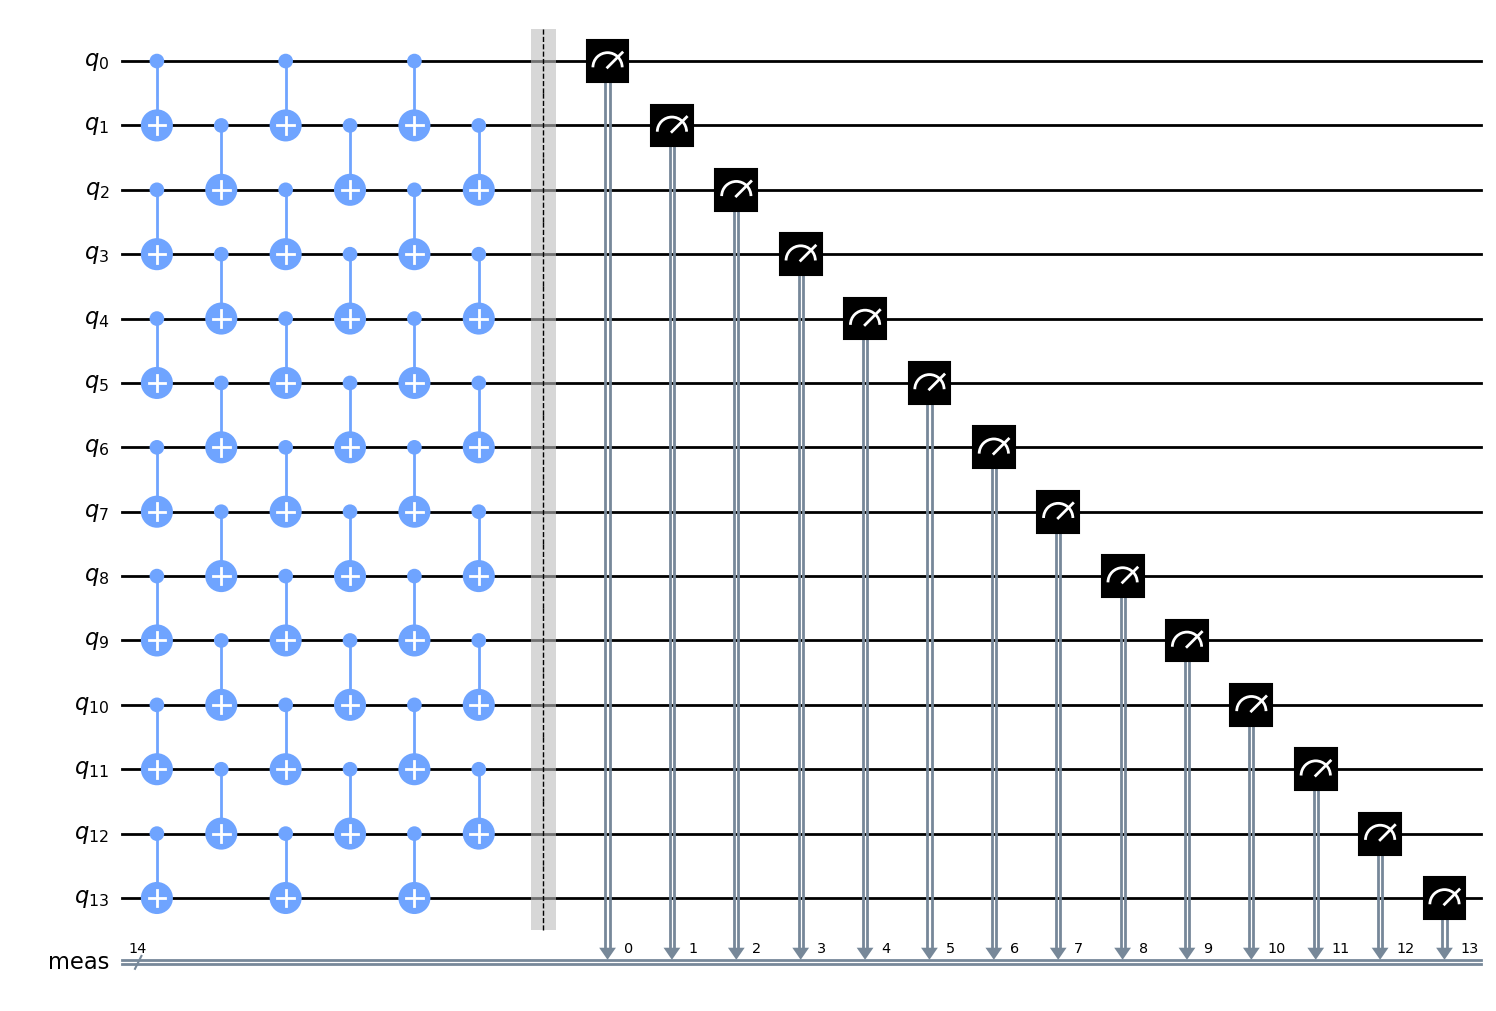

In [4]:
num_qubits = 14
k = 3
brick_circ = QuantumCircuit(num_qubits)

for i in range(k):
    for q in range(int(num_qubits/2)):
        brick_circ.cx(2*q, 2*q+1)
        
    for q in range(int(num_qubits/2)-1):
        brick_circ.cx(2*q+1, 2*q+2)
        
    # circ.barrier()

brick_circ.measure_all()

brick_circ.draw('mpl', fold=1)


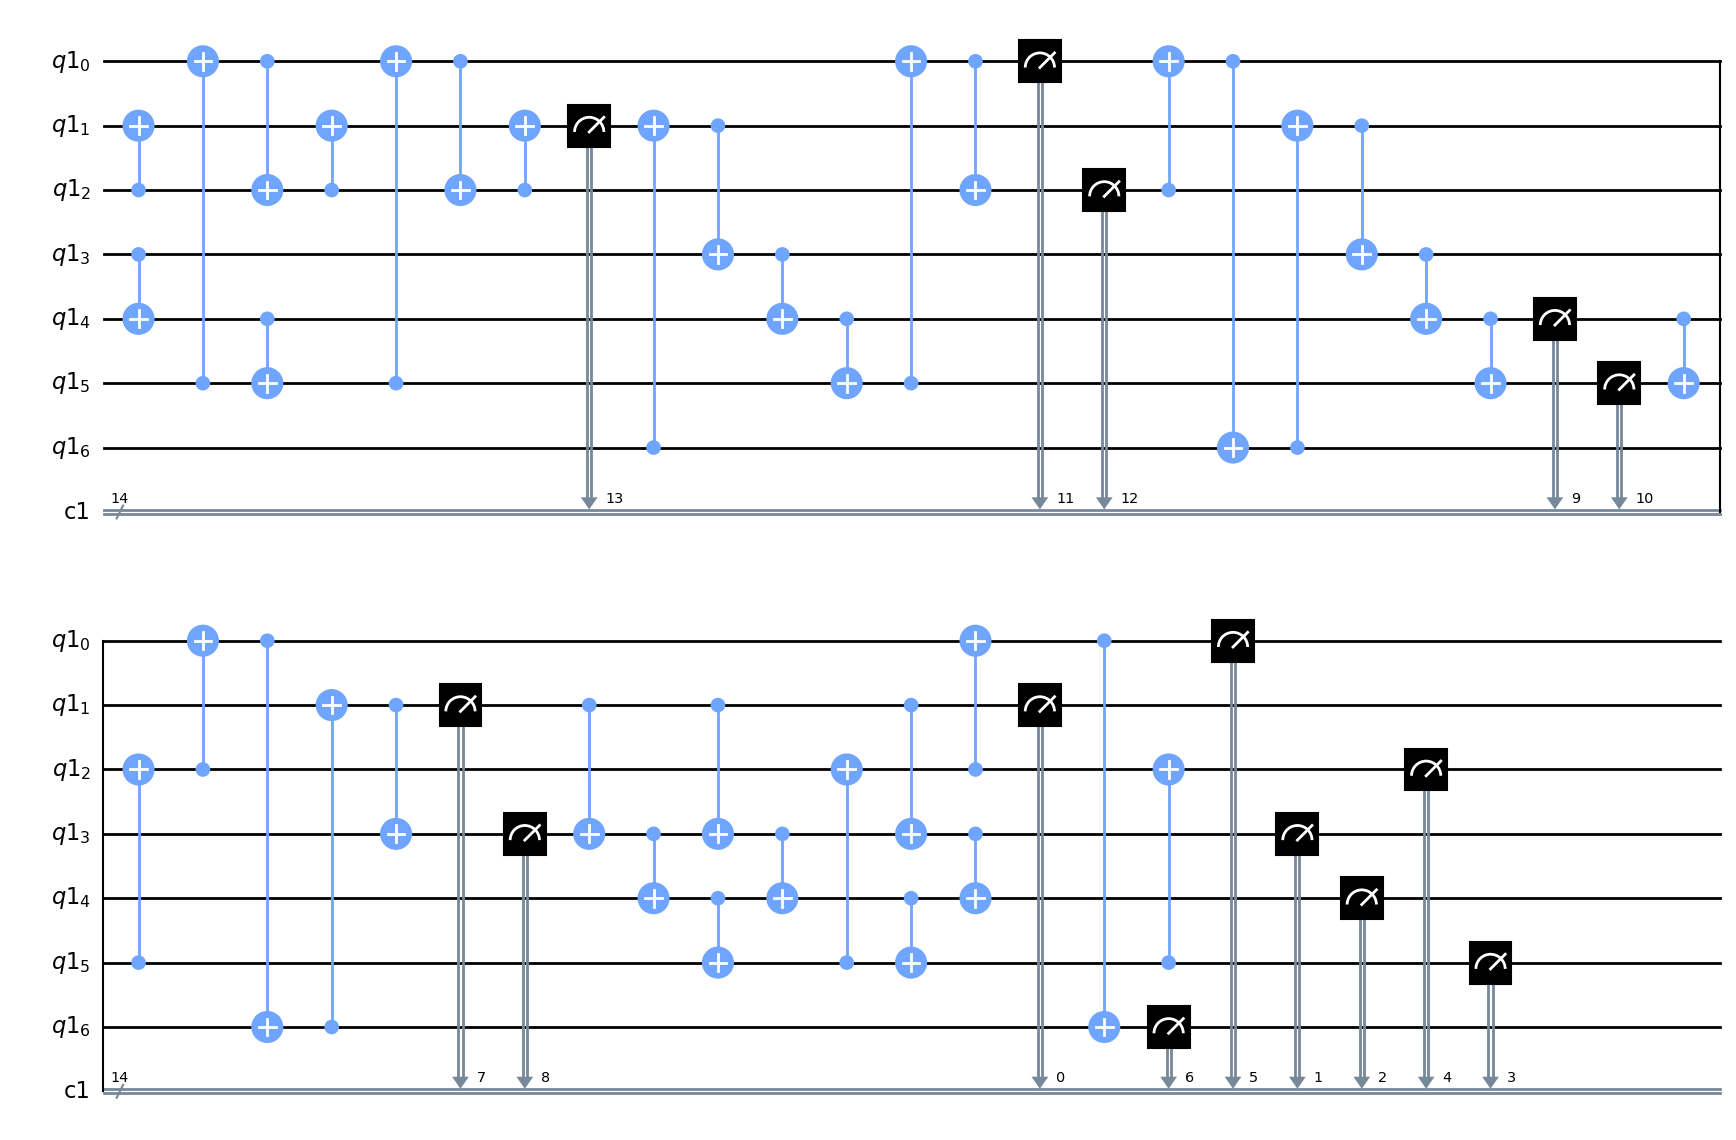

In [5]:
gidnet = GidNET(brick_circ)
gidnet.compile_to_dynamic_circuit(iterations=20, draw=True)

In [6]:
gidnet.dynamic_circuit_width

7

In [7]:
# Generation of df11 data for GidNET 
from gidnet.qubitreuse import GidNET
from qcg.helper_functions.benchmarks import generate_circ
from qiskit import QuantumCircuit
import numpy as np


In [32]:
circuit_sizes = [16, 20, 25, 30, 36, 42, 49, 56, 64, 72, 81, 90, 100, 110, 121, 132, 144]
iterations = 10 # shots for qnet algorithm

gidnet_average_time = []
gidnet_std_time = []
gidnet_qubit_width = []

for i, circuit_size in enumerate(circuit_sizes):
    print("circuit", i+1, "running")
    circuit_type = "supremacy"

    supremacy_circuit = generate_circ(
            num_qubits=circuit_size,
            depth=1,
            circuit_type=circuit_type,
            reg_name="q",
            connected_only=True,
            seed=None,
    )

    if supremacy_circuit is not None:
        supremacy_circuit.measure_all()

    gidnet = GidNET(supremacy_circuit)

    #### GIDNET EXPERIMENT BEGINS #####
    gidnet_time = %timeit -o gidnet.compile_to_dynamic_circuit(iterations)

    gidnet_average_time.append(gidnet_time.average)
    gidnet_std_time.append(gidnet_time.stdev)
    gidnet_qubit_width.append(gidnet.dynamic_circuit_width)


circuit 1 running
Generating 4x4, 1+8+1 supremacy circuit
42 ms ± 4.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
circuit 2 running
Generating 5x4, 1+8+1 supremacy circuit
65.8 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
circuit 3 running
Generating 5x5, 1+8+1 supremacy circuit
111 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
circuit 4 running
Generating 6x5, 1+8+1 supremacy circuit
127 ms ± 7.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
import pandas as pd
# Convert lists to a dictionary
data = {
    'Circuit Sizes': circuit_sizes,
    'GidNET Average Runtime': gidnet_average_time,  # Added comma
    'GidNET Stdev Runtime': gidnet_std_time,  # Added comma
    'GidNET Width': gidnet_qubit_width,
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('GidNET_v02_width_and_runtime_supremacy_cct_data.csv', index=False)


In [ ]:
# Generation of df11 data for all algorithms

import pandas as pd

# Assuming you've already loaded these DataFrames or you can load them from CSVs directly
df_gidnet = pd.read_csv('data_cutqc_supremacy_cct/GidNET_v02_width_and_runtime_cutqc_supremacy_cct_data.csv')
df_qnet = pd.read_csv('data_cutqc_supremacy_cct/QNET_width_and_runtime_cutqc_supremacy_cct_data.csv')
df_qiskit = pd.read_csv('data_cutqc_supremacy_cct/Qiskit_width_and_runtime_cutqc_supremacy_cct_data.csv')

# Merging the DataFrames on 'Circuit Sizes'
df_combined = pd.merge(df_gidnet, df_qnet, on='Circuit Sizes', how='outer', suffixes=('_gidnet', '_qnet'))
df_combined = pd.merge(df_combined, df_qiskit, on='Circuit Sizes', how='outer', suffixes=('', '_qiskit'))

# Save the combined DataFrame to CSV
df_combined.to_csv('data_cutqc_supremacy_cct/combined_v02_width_and_runtime_cutqc_supremacy_cct_data.csv', index=False)

In [ ]:
# Combination of df11, df12 and df15 data

# first plot

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data for each depth
df11 = pd.read_csv('combined_data/combined_v02_width_and_runtime_cutqc_supremacy_cct_data.csv')
df12 = pd.read_csv('combined_data/combined_v02_width_and_runtime_supremacy_cct_cycle_10_data.csv')
df15 = pd.read_csv('combined_data/combined_v02_width_and_runtime_supremacy_cct_cycle_13_data.csv')

# Adjust the figure size and set DPI for higher quality output
plt.figure(figsize=(8, 6), dpi=400)

# Define distinct linestyles
styles = ['-', ':', '-.']
depth_labels = ['Depth 11', 'Depth 12', 'Depth 15']

# Define colors and markers
colors = {'GidNET': 'green', 'QNET': 'blue', 'Qiskit': 'red'}
markers = {'GidNET': 'o', 'QNET': '^', 'Qiskit': 'x'}
algorithm_labels = list(colors.keys())

# Plot for each depth (GidNET, QNET, Qiskit)
for i, df in enumerate([df11, df12, df15]):
    plt.plot(df["Circuit Sizes"], df["GidNET Width"], marker=markers['GidNET'], color=colors['GidNET'], linestyle=styles[i], markersize=4)
    plt.plot(df["Circuit Sizes"], df["QNET Width"], marker=markers['QNET'], color=colors['QNET'], linestyle=styles[i], markersize=4)
    plt.plot(df["Circuit Sizes"], df["Qiskit Width"], marker=markers['Qiskit'], color=colors['Qiskit'], linestyle=styles[i], markersize=4)

# Adding titles and labels
plt.xlabel('Initial Circuit Width', fontsize=14, fontweight='bold')
plt.ylabel('Final Circuit Width', fontsize=14, fontweight='bold')

# Create custom legends
from matplotlib.lines import Line2D

# Legend for algorithms with just markers
algorithm_handles = [Line2D([0], [0], color=colors[key], marker=markers[key], linestyle='None', markersize=8) for key in colors]

# Legend for depths
depth_handles = [Line2D([0], [0], color='black', lw=4, linestyle=style) for style in styles]

# Introduce spacer to align legends side by side properly
spacer = Line2D([0], [0], color='none', marker='None', linestyle='None')

# Combine handles and labels with spacer
combined_handles = algorithm_handles + [spacer] + depth_handles
combined_labels = algorithm_labels + [""] + depth_labels

# Add single legend
plt.legend(prop={'size': 12, 'weight': 'bold'}, handles=combined_handles, labels=combined_labels, loc='upper left', ncol=2, handlelength=3, fontsize=12, frameon=True, borderpad=1, labelspacing=1.2, columnspacing=4)

plt.xticks(fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)

# Enable grid for better visibility
# plt.grid(True)

# Save the figure as a PDF file for high-quality vector graphics
plt.savefig('combined_plots/GidNET_v02_QNET_and_Qiskit_width_reduction.pdf', format='pdf', bbox_inches='tight')

# Display the plot
plt.show()


In [ ]:
# second paper plot

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D

# Define model functions for polynomial fitting
def model_gidnet(n, c):
    # return c * np.log2(n) * n**3
    return c * n**3

def model_qnet(n, c):
    return c * n**5

# Load data for each depth
df11 = pd.read_csv('combined_data/combined_v02_width_and_runtime_cutqc_supremacy_cct_data.csv')
df12 = pd.read_csv('combined_data/combined_v02_width_and_runtime_supremacy_cct_cycle_10_data.csv')
df15 = pd.read_csv('combined_data/combined_v02_width_and_runtime_supremacy_cct_cycle_13_data.csv')

# Figure settings
plt.figure(figsize=(10, 8), dpi=600)

# Define colors, markers, and styles
colors = {'GidNET': 'green', 'QNET': 'blue', 'Qiskit': 'red'}
markers = {'GidNET': 'o', 'QNET': '^', 'Qiskit': 'x'}
styles = ['-', ':', '-.']
depth_labels = ['Depth 11', 'Depth 12', 'Depth 15']
# fit_labels = [r'GidNET Fit: c⋅n3logn\mathbf{c \cdot n^3 \log{n}}', r'QNET Fit: c⋅n5\mathbf{c \cdot n^5}']
fit_labels = [r'GidNET Fit: c⋅n3\mathbf{c \cdot n^3}', r'QNET Fit: c⋅n5\mathbf{c \cdot n^5}']

# Plotting
dfs = [df11, df12, df15]
for i, df in enumerate(dfs):
    popt_gidnet, _ = curve_fit(model_gidnet, df["Circuit Sizes"], df["GidNET Average Runtime"])
    popt_qnet, _ = curve_fit(model_qnet, df["Circuit Sizes"], df["QNET Average Runtime"])

    plt.errorbar(df["Circuit Sizes"], df["GidNET Average Runtime"], yerr=df["GidNET Stdev Runtime"],
                 fmt=styles[i], marker=markers['GidNET'], color=colors['GidNET'], capsize=5, label=f'GidNET {depths[i]}')
    if i==1:
        plt.plot(df["Circuit Sizes"], model_gidnet(df["Circuit Sizes"], *popt_gidnet), color='#cc79a7', linestyle="--",
             label=fit_labels[0])

    plt.errorbar(df["Circuit Sizes"], df["QNET Average Runtime"], yerr=df["QNET Stdev Runtime"],
                 fmt=styles[i], marker=markers['QNET'], color=colors['QNET'], capsize=5, label=f'QNET {depths[i]}')
    if i==1:
        plt.plot(df["Circuit Sizes"], model_qnet(df["Circuit Sizes"], *popt_qnet), color="orange", linestyle="--",
             label=fit_labels[1])

    plt.errorbar(df["Circuit Sizes"], df["Qiskit Average Runtime"], yerr=df["Qiskit Stdev Runtime"],
                 fmt=styles[i], marker=markers['Qiskit'], color=colors['Qiskit'], capsize=5, label=f'Qiskit {depths[i]}')

# Labels and scale
plt.xlabel('Initial Circuit Width', fontsize=16, fontweight='bold')
plt.ylabel('Average Runtime (s)', fontsize=16, fontweight='bold')
plt.yscale('log')

plt.xticks(fontweight='bold', fontsize=16)
plt.yticks(fontweight='bold', fontsize=16)

# Legends
# algorithm_handles = [Line2D([0], [0], marker=markers[name], color=colors[name], linestyle='None', markersize=10) for name in colors]
# depth_handles = [Line2D([0], [0], color='black', linestyle=style, markersize=10) for style in styles]
# fit_handles = [Line2D([0], [0], color='black', linestyle='--', markersize=10) for _ in fit_labels]

# combined_handles = algorithm_handles + [Line2D([0], [0], marker='None', linestyle='None')] + depth_handles + fit_handles
# combined_labels = list(colors.keys()) + [''] + depths + fit_labels

# Create custom legends
from matplotlib.lines import Line2D

# Legend for algorithms with just markers
algorithm_handles = [Line2D([0], [0], color=colors[key], marker=markers[key], linestyle='None', markersize=8) for key in colors]

# Legend for depths
depth_handles = [Line2D([0], [0], color='black', lw=3, linestyle=style) for style in styles]

# Legend for fits
fit_handles = [Line2D([0], [0], color=color, lw=3, linestyle='--', markersize=10) for color in ['#cc79a7', "orange"]]

# Introduce spacer to align legends side by side properly
spacer = Line2D([0], [0], color='none', marker='None', linestyle='None')

# Combine handles and labels with spacer
combined_handles = algorithm_handles + [spacer] + depth_handles + [spacer] + fit_handles
combined_labels = algorithm_labels + [""] + depth_labels + [""] + fit_labels

# plt.legend(prop={'size': 12, 'weight': 'bold'}, handles=combined_handles, labels=combined_labels, loc='upper left', ncol=4, frameon=True, fontsize=12, handlelength=2.5, handletextpad=0.5, columnspacing=3, borderpad=1)
plt.legend(prop={'size': 13, 'weight': 'bold'}, handles=combined_handles, labels=combined_labels, loc='upper left', ncol=3, handlelength=3, fontsize=12, frameon=True, borderpad=1, labelspacing=1.2, columnspacing=1.1)

# Save and display
plt.savefig('combined_plots/GidNET_QNET_Qiskit_runtime_comparison.pdf', format='pdf', bbox_inches='tight')
plt.show()
